# Stochastic Gradient Descent (SGD)

**Prerequisites**

- Tensorflow
- Gradient descent

**Outcomes**

- Understand the issues with gradient descent
- Understand the concepts of momentum and adaptive learning rates
- Understand the concept of epochs and batches
- Be familiar with SGD variants like Adagrad, RMSprop, and ADAM

In [1]:
import tensorflow as tf

## Local Minimum Problem

- Gradient descent can be used to find a local minimum near the starting position
- However, sometimes our starting position is close to a local minimum, but far from a global or better "less-local" minimum
- For example, consider this objective function surface:

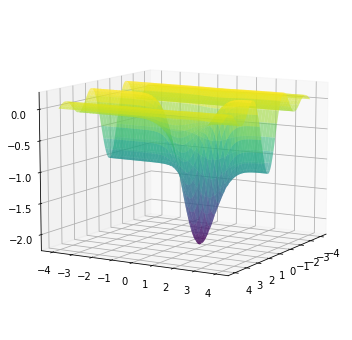

In [2]:
from gradient_descent import (
    plot_surf, grad_desc_tf, plot_path, plot_contour_path
)

def f2(x):
    return  -tf.experimental.numpy.sinc(x[0])-2*tf.exp(-((x[0]-1)**2 + (x[1]-1)**2))

ax = plot_surf(f2, lim=4, alpha=0.6)
ax.view_init(10, 30);

### Gradient Descent Stuck

- We will try to If we try to apply gradient descent to this surface 
- We'll choose a starting point of `[1.2, -1.9]`

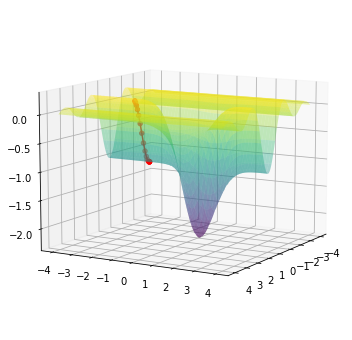

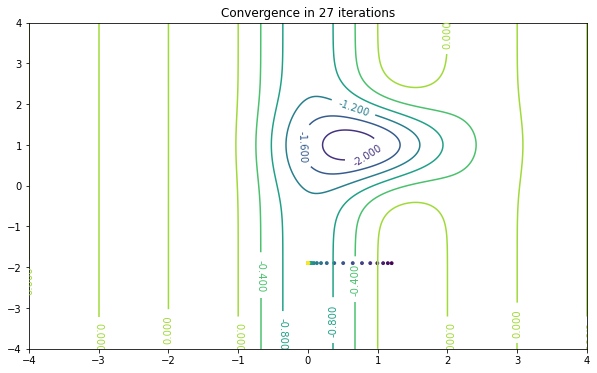

In [3]:
trace1 = grad_desc_tf(f2, [1.2, -1.9], T=5000);
ax = plot_path(f2, trace1, lim=4, alpha=0.4)
ax.view_init(10, 30);
plot_contour_path(f2, trace1, lim=4);

### Need for Momentum

- From contour plot above we see we move very little in `x2` dimension

In [4]:
trace1[0]["x"] - trace1[-1]["x"]

array([ 1.1995577 , -0.00394869], dtype=float32)

- Howevever we do move a little
- Idea: could we continue to propogate movement in `x2` dimension to avoid getting stuck?
- Alternative idea: could we "magnify" movements in x2 dimension where gradients are not as steep? (keep in mind -- will revisit)

### Momentum

- Let's explore continuing to propogate movement in 
- Intuition: build up momentum in each direction
    - Will allow us to pass over "flat" spaces in dimensions with very small gradients
    - Will also dampen movements in steep dimensions
- Application: use exponentially decaying moving average to track momentum in each dimension
    - Keep track of momentum on iteration $i$ using $v_i$
    - Start with $v_0 = 0$
    - Update rule for iteration $i$: $$\begin{align*}v_{i+1} &= \gamma v_i + \alpha \nabla f(x) \\ x_{i+1} &= x_i - v_{i+1}\end{align*}$$
    

#### Code example

In [5]:
def grad_desc_tf_mom(f, x0, epsilon=1e-3, T=200, alpha=0.1, gamma=0.7):

    trace = []
    x = tf.Variable(x0)
    v = tf.zeros(x.shape)  # NEW CODE
    for i in range(T):
        with tf.GradientTape() as tape:
            fx = f(x)
        dfdx = tape.gradient(fx, x)
        vp = alpha*dfdx + gamma*v  # NEW CODE
        xp = x - vp  # NEW CODE
        err = max(abs(dfdx))
        status = dict(
            i=i, fx=fx.numpy(), dfdx=dfdx.numpy(), err=err.numpy(), x=x.numpy()
        )
        trace.append(status)
        if err < epsilon and max(abs(vp)) < epsilon:
            return trace

        x = tf.Variable(xp)
        v = vp  # NEW CODE

    raise ValueError("No convergence")

#### Application

- Let's try this momentum algorithm with our troublsome surface from above
- Note we'll use the same learning rate and starting point

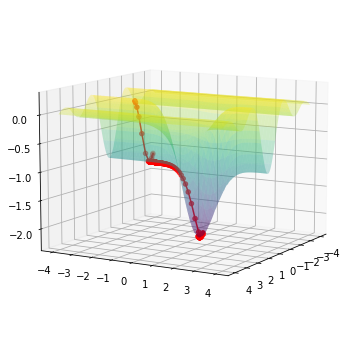

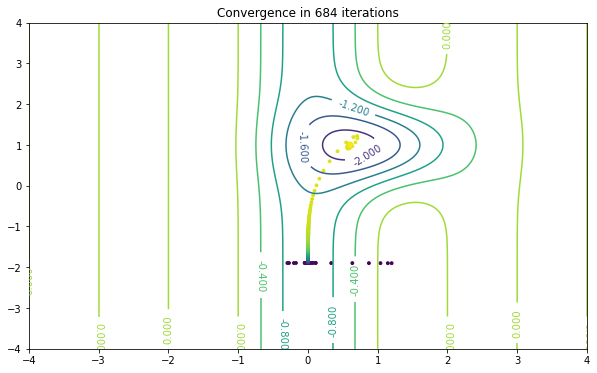

In [6]:
trace_mom = grad_desc_tf_mom(f2, [1.2, -1.9], T=1000);
ax = plot_path(f2, trace_mom, lim=4, alpha=0.3)
ax.view_init(10, 30);
plot_contour_path(f2, trace_mom, lim=4);

- We no longer get stuck!
- The small momentum built up in dimension `x2` allowed the algorithm to continue moving down that very slight slope until we find the global miminum

In [7]:
trace_mom[0]["x"] - trace_mom[-1]["x"]

array([ 0.5971627, -2.8999836], dtype=float32)

## Paper review

- Gradient descent algorithms come in many variants
- We've seen one example here that adds momementum
- There are many others
- There is an excellent review paper that describes the algorithms
- **Reference**
    - paper: https://arxiv.org/abs/1609.04747
    - website: https://ruder.io/optimizing-gradient-descent/